# Import packages

In [2]:
import pandas as pd, numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('advertising.csv')

In [13]:
#remove all columns with qualitative data
df_quantitative_vars = df

cols_to_remove = []

for col in df_quantitative_vars.columns:
    try:
        _ = df_quantitative_vars[col].astype(float) 
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
df_quantitative_vars = df_quantitative_vars[[col for col in df_quantitative_vars.columns if col not in cols_to_remove]]

Couldn't covert Ad Topic Line to float
Couldn't covert City to float
Couldn't covert Country to float
Couldn't covert Timestamp to float


In [15]:
#check and make sure it worked
df_quantitative_vars.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


# Decision Tree

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_quantitative_vars.drop('Clicked on Ad',axis=1)
y = df_quantitative_vars['Clicked on Ad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

In [19]:
#train a single decision tree to start
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[139   7]
 [  6 148]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       146
           1       0.95      0.96      0.96       154

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=250)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[143   3]
 [  4 150]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       146
           1       0.98      0.97      0.98       154

   micro avg       0.98      0.98      0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



# Principal Component Analysis

In [75]:
#IMPORTANT:

#The use of PCA is useful when you have high dimensional data
#it minimizes the dimensions to just n most significant features
#you set the n!

#After you minimize the dimensionality, you can run a classification
#algorithm to predict what class observations belong to.

In [35]:
from sklearn.datasets import load_breast_cancer

In [44]:
cancer = load_breast_cancer()

In [45]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [56]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [57]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
scaled_data = scaler.transform(df)

In [62]:
#perform the actual PCA

from sklearn.decomposition import PCA

In [63]:
#here is where you can set the number of principal components
pca = PCA(n_components=2)

In [64]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
x_pca = pca.transform(scaled_data)

In [66]:
scaled_data.shape

(569, 30)

In [67]:
x_pca.shape

(569, 2)

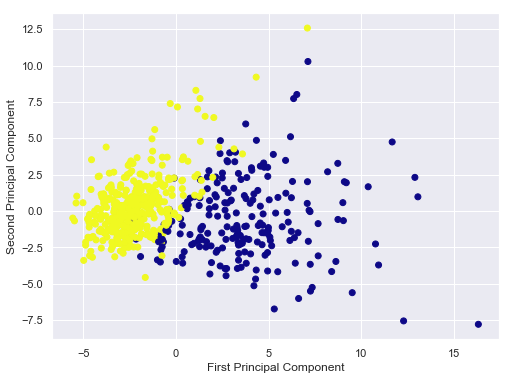

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [71]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [72]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [73]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


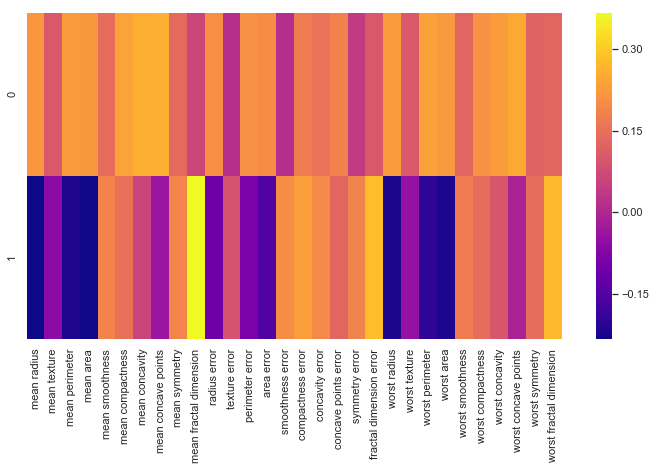

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')
#each PC is a row, the more yellow the more correlated it is 
#with that feature

# Advertising data PCA + Classifier

In [77]:
ad_data = pd.read_csv('advertising.csv')

In [79]:
ad_data.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

In [103]:
def PCA_selector(df, n_components=2):
    
    '''Takes in a dataframe and removes qualitative features
    from it. You can specify the number of principal components
    but the default number is 2.
    
    Returns a dataframe with the correlation of each principle
    along the other variables.'''

    df_quantitative_vars = df

    cols_to_remove = []

    for col in df_quantitative_vars.columns:
        try:
            _ = df_quantitative_vars[col].astype(float) 
        except ValueError:
            cols_to_remove.append(col)
            pass

    # keep only the columns in df that do not contain string
    df_quantitative_vars = df_quantitative_vars[[col for col in df_quantitative_vars.columns if col not in cols_to_remove]]
    
    scaler = StandardScaler()
    scaler.fit(df_quantitative_vars)
    scaled_data = scaler.transform(df_quantitative_vars)

    from sklearn.decomposition import PCA

    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    df_comp = pd.DataFrame(pca.components_, columns=df_quantitative_vars.columns.values)
    return df_comp.head()

In [104]:
PCA_selector(ad_data)

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,-0.466615,0.351132,-0.335124,-0.484643,-0.017732,0.558100
1,-0.071472,-0.050242,-0.051406,0.019603,0.994602,-0.010392


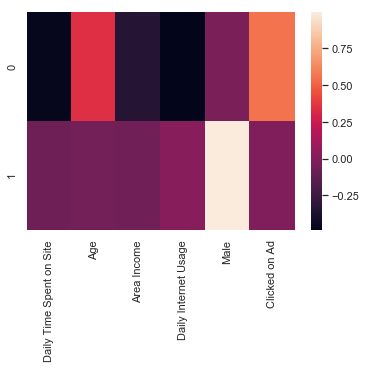

In [96]:
sns.heatmap(df_comp)